In [30]:
# Importing pythonEDA Package

import pandas as pd

In [31]:
# Hide warnings

import warnings
warnings.filterwarnings('ignore')

In [32]:
#Setting column width of max 400

pd.set_option('max_colwidth', 400)

In [33]:
# Load dataset which is in the form of excel sheet
# Dataset from CIC Truth Seeker Dataset 2023  - https://www.unb.ca/cic/datasets/truthseeker-2023.html

original_tweets = pd.read_csv("Twitter Analysis.csv")

In [34]:
# Knowing the size of our dataset

original_tweets.shape

(134198, 64)

In [35]:
# Previewing first 5 records from the head 

original_tweets.head()

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?",4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?\n\nMeanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.\n\nFuck off with this corporatist propaganda.",1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,"@POTUS Biden Blunders\n\nBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)",4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of Americans could lose their housing in the middle of a pandemic.,1.0,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF.",70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19


In [36]:
#Retrieving columns from the dataset

original_tweets.columns

Index(['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget',
       'tweet', 'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'following', 'embeddings', 'BotScore',
       'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes',
       'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count',
       'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
       'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
       'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
       'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
       'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
       'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
       'Word count', 'Max word length', 'Min word length',
       'Average word length', 'present_verbs', 'past_verbs', 'adjectives',
       'adverbs', 'adpositions', 'pronouns', 'TOs', 'deter

In [37]:
#Checking unique values per attribute

original_tweets.nunique()

Unnamed: 0         134198
majority_target         2
statement            1058
BinaryNumTarget         2
tweet              134198
                    ...  
ampersand              12
capitals              238
digits                118
long_word_freq         48
short_word_freq        92
Length: 64, dtype: int64

In [38]:
#Checking datatypes and overal info

original_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              134198 non-null  int64  
 1   majority_target         134198 non-null  bool   
 2   statement               134198 non-null  object 
 3   BinaryNumTarget         134198 non-null  float64
 4   tweet                   134198 non-null  object 
 5   followers_count         134198 non-null  float64
 6   friends_count           134198 non-null  float64
 7   favourites_count        134198 non-null  float64
 8   statuses_count          134198 non-null  float64
 9   listed_count            134198 non-null  float64
 10  following               134198 non-null  float64
 11  embeddings              134198 non-null  object 
 12  BotScore                134198 non-null  float64
 13  BotScoreBinary          134198 non-null  float64
 14  cred                

In [39]:
# Checking for duplicates records

original_tweets.duplicated().sum()

0

In [40]:
original_tweets['statement'].duplicated().sum()

133140

We will be ignoring most of the attributes from the dataset which are the features of english text like quotes, pronouns, lenght, and many more. Beside this we will ignore, unnamed : 0 as we don't neeed a sequence in our dataset. We ignore statement attribute too due to many duplicate values and we will not add binary number target attribute as well because it resembles majority target which we will be using.


In [41]:
features = ['majority_target','tweet','followers_count','favourites','friends_count','statuses_count','listed_count','mentions','replies','retweets','cred']

In [42]:
twitter_data = original_tweets[[x for x in features]]
twitter_data

,majority_target,tweet,followers_count,favourites,friends_count,statuses_count,listed_count,mentions,replies,retweets,cred
0,True,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?",4262.0,10.0,3619.0,16423.0,44.0,1.0,1.0,3.0,0.540794
1,True,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?\n\nMeanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.\n\nFuck off with this corporatist propaganda.",1393.0,1.0,1621.0,37184.0,64.0,3.0,0.0,0.0,0.462177
2,True,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!,9.0,0.0,84.0,1184.0,0.0,0.0,5.0,0.0,0.096774
3,True,"@POTUS Biden Blunders\n\nBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)",4262.0,0.0,3619.0,16423.0,44.0,1.0,0.0,0.0,0.540794
4,True,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF.",70.0,1.0,166.0,2194.0,0.0,1.0,0.0,0.0,0.296610
...,...,...,...,...,...,...,...,...,...,...,...
134193,False,"Joe Biden's family owned African slaves....\n\nJoe Biden's great-grandfather, Joseph J. Biden (1828-1880) was a slave owner and fought for the Confederate States of America....",2075.0,2.0,2662.0,62375.0,3.0,0.0,1.0,1.0,0.438041
134194,False,"Joe Bidens great, great grandfather was a slave owner.\n\nHis family owned 12 slaves.",1636.0,1.0,1626.0,44011.0,10.0,0.0,0.0,1.0,0.501533
134195,False,"@ChevyChaseToGo ""Joe Bidens great-grandfather Joseph J. Biden (1828-1880) was a slave-owner and fought for the Confederate States of America",286.0,0.0,2501.0,7617.0,1.0,1.0,0.0,0.0,0.102619
134196,False,@JoeBiden Facts are Bidens VP Kamala Harris Great Great Grandfather was Hamilton Brown a Prominent Successful Slave Plantation Owner and Slave Driver in Jamaica. So Proud Biden chose a VP that comes from a Slave Driving Family as an example of US American History.,2.0,0.0,45.0,509.0,0.0,1.0,0.0,0.0,0.042553


In [43]:
twitter_data.nunique()

majority_target         2
tweet              134198
followers_count     14444
favourites            936
friends_count       10058
statuses_count      49323
listed_count         1979
mentions               13
replies               273
retweets              540
cred                81684
dtype: int64

In [44]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   majority_target  134198 non-null  bool   
 1   tweet            134198 non-null  object 
 2   followers_count  134198 non-null  float64
 3   favourites       134198 non-null  float64
 4   friends_count    134198 non-null  float64
 5   statuses_count   134198 non-null  float64
 6   listed_count     134198 non-null  float64
 7   mentions         134198 non-null  float64
 8   replies          134198 non-null  float64
 9   retweets         134198 non-null  float64
 10  cred             134198 non-null  float64
dtypes: bool(1), float64(9), object(1)
memory usage: 10.4+ MB


In [45]:
#Let's do a correlation matrix among the numeric attributes of our dataset to get some more insights

correlation_matrix = twitter_data.corr()

In [46]:
# Importing data visualization package

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<Axes: >

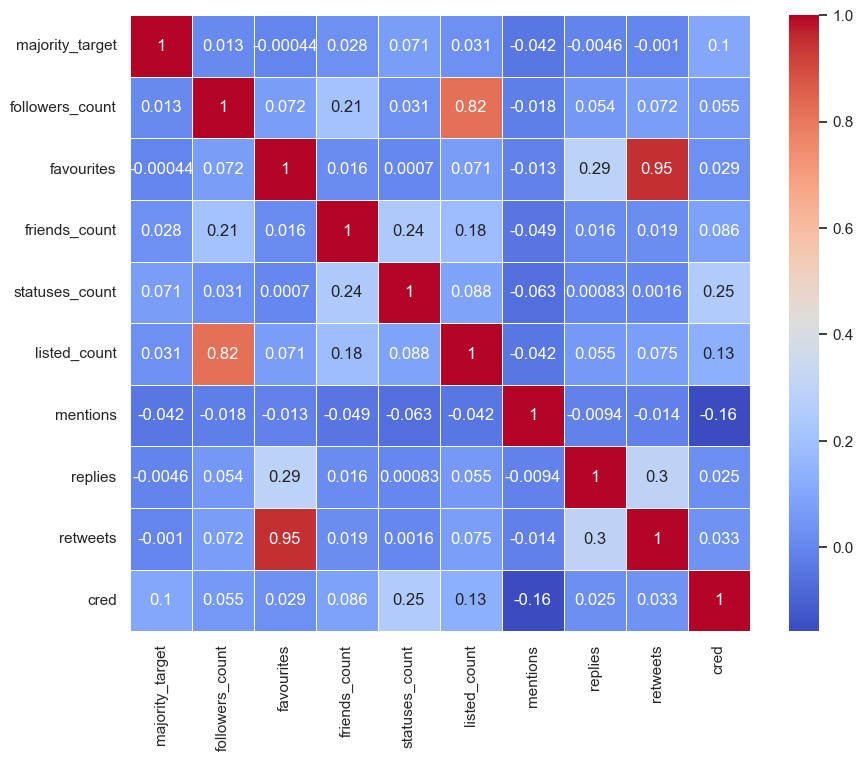

In [47]:
# Generate the heatmap using seaborn.

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [48]:
#Checking for total number of unique values in retweets and favourites so that we can remove one of them as they are highly correlated. 
#Although our main focus is tweets and its sentiment but we can reduce the dimension of our dataset a little more for efficient processing during EDA.

twitter_data['retweets'].nunique(),twitter_data['favourites'].nunique()

(540, 936)

In [49]:
#Since favourites has more unique values, we will keep it

twitter_data = twitter_data.drop(columns='retweets')

In [56]:
#Checking for total number of unique values in followers count and listed count so that we can remove one of them as they are highly correlated. 
#Although our main focus is tweets and its sentiment but we can reduce the dimension of our dataset a little more for efficient processing during EDA.

twitter_data['followers_count'].nunique(),twitter_data['listed_count'].nunique()

(14444, 1979)

In [57]:
#Since followers count has more unique values, we will keep it

twitter_data = twitter_data.drop(columns='listed_count')

In [50]:
twitter_data.columns

Index(['majority_target', 'tweet', 'followers_count', 'favourites',
       'friends_count', 'statuses_count', 'listed_count', 'mentions',
       'replies', 'cred'],
      dtype='object')

In [51]:
# Checking Unique values in majority target

twitter_data['majority_target'].unique()

array([ True, False])

In [52]:
# Checking Count of Unique values in majority target

twitter_data['majority_target'].value_counts()

True     68985
False    65213
Name: majority_target, dtype: int64

<Axes: xlabel='majority_target', ylabel='count'>

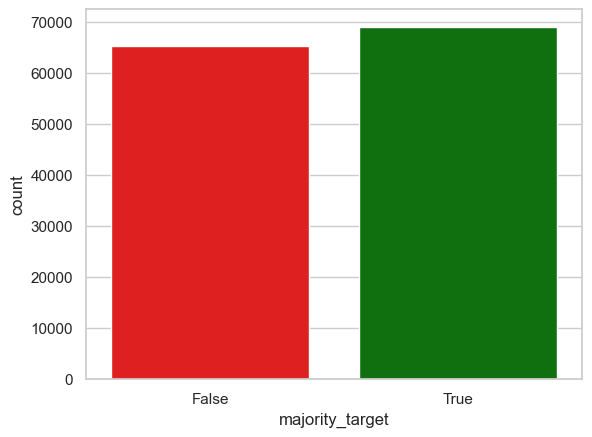

In [53]:
# Plotting majority target of tweets

sns.countplot(x='majority_target', data=twitter_data, palette=['red', 'green', 'blue'])


<Axes: xlabel='listed_count', ylabel='mentions'>

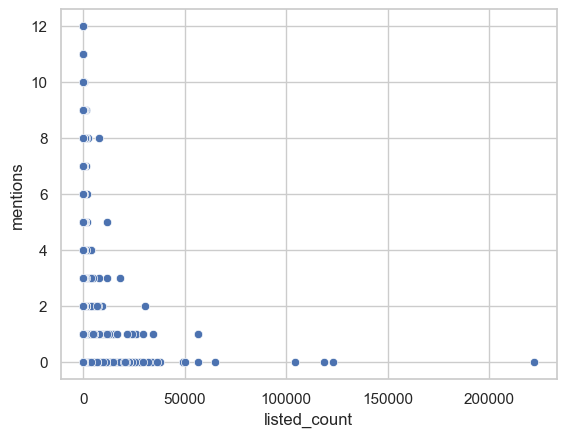

In [54]:
# Plotting list of tweets user has in correspondent to number of times the user is mentioned

sns.scatterplot(x=twitter_data['listed_count'],y=twitter_data['mentions'])

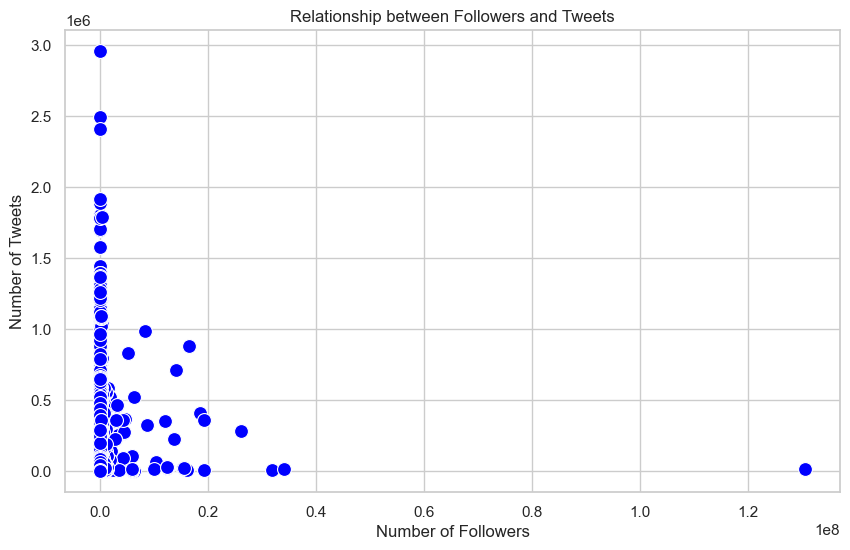

In [58]:
# Relation between number of followers a user have vs the number of tweets user have

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=twitter_data['followers_count'], y=twitter_data['statuses_count'], color='blue', s=100)

# Adding titles and labels
plt.title('Relationship between Followers and Tweets')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Tweets')

plt.show()

Text(0, 0.5, 'Number of Mentions')

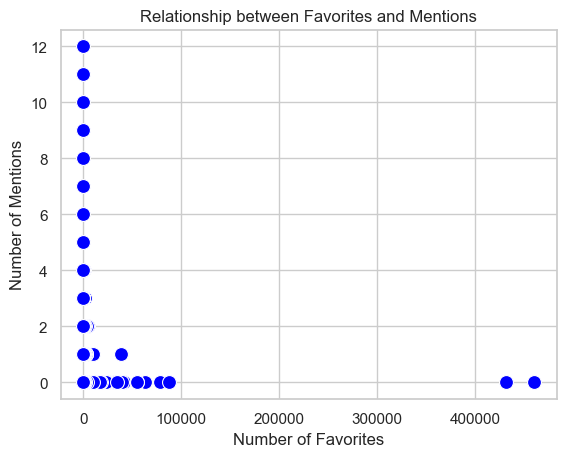

In [59]:
# Plotting favourites a user has and the number of times user is mentioned

sns.scatterplot(x=twitter_data['favourites'], y=twitter_data['mentions'],color='blue', s=100)

# Adding titles and labels
plt.title('Relationship between Favorites and Mentions')
plt.xlabel('Number of Favorites')
plt.ylabel('Number of Mentions')

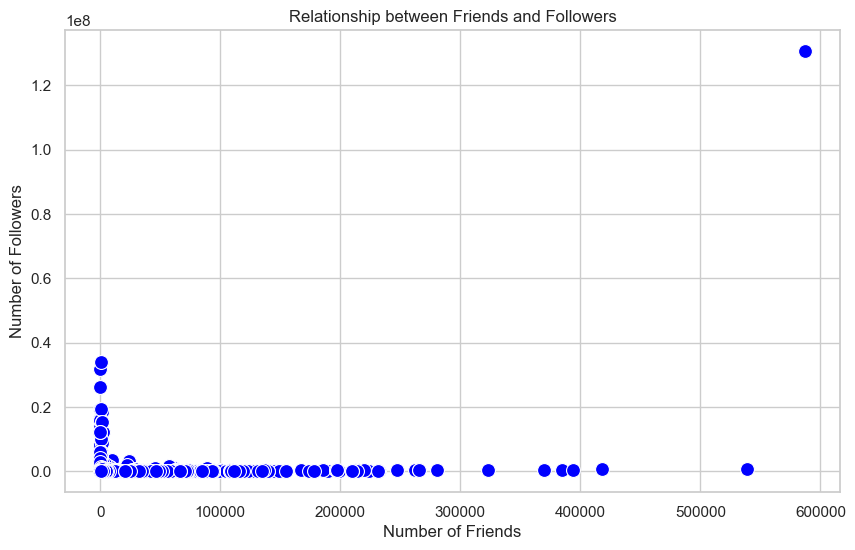

In [60]:
# Scatter plot for relationship between number of friends vs number of folowers

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=twitter_data['friends_count'], y=twitter_data['followers_count'], color='blue', s=100)

# Adding titles and labels
plt.title('Relationship between Friends and Followers')
plt.xlabel('Number of Friends')
plt.ylabel('Number of Followers')

plt.show()

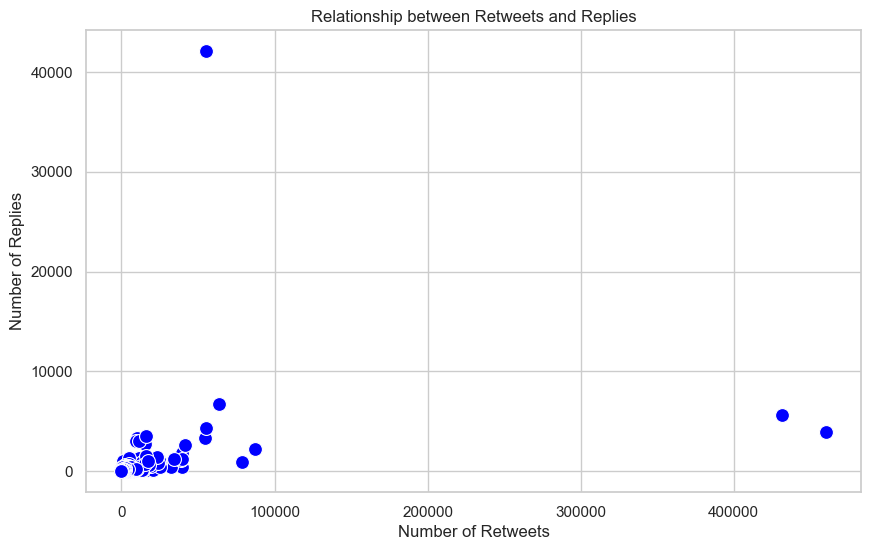

In [66]:
# Scatter plot for retweets vs replies

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=twitter_data['favourites'], y=twitter_data['replies'], color='blue', s=100)

# Adding titles and labels
plt.title('Relationship between Retweets and Replies')
plt.xlabel('Number of Retweets')
plt.ylabel('Number of Replies')

plt.show()

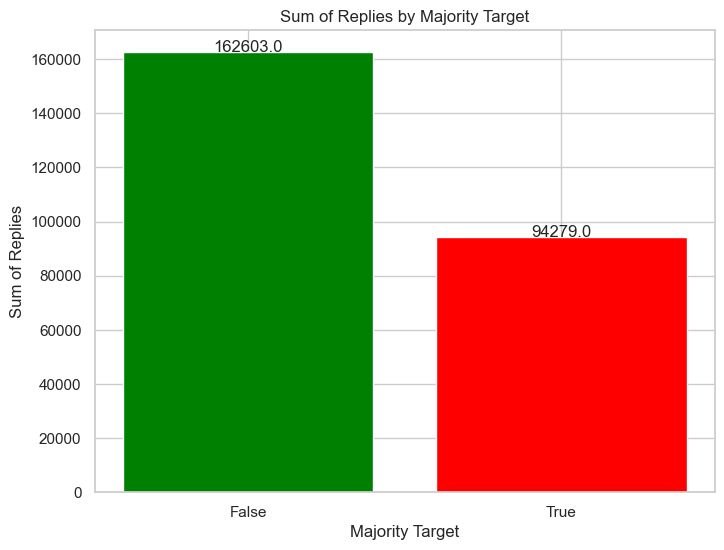

In [71]:
#Creating bar chart for number of replies for true tweets vs false tweets

# Grouping and summing the replies by majority_target
sum_replies = twitter_data.groupby('majority_target')['replies'].sum().reset_index()

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(sum_replies['majority_target'], sum_replies['replies'], color=['green', 'red'])

# Adding data labels on the bars
for i, value in enumerate(sum_replies['replies']):
    plt.text(i, value + 0.2, str(value), ha='center', fontsize=12)

# Adding titles and labels
plt.title('Sum of Replies by Majority Target')
plt.xlabel('Majority Target')
plt.ylabel('Sum of Replies')

plt.xticks([0, 1], ['False', 'True'])

plt.show()

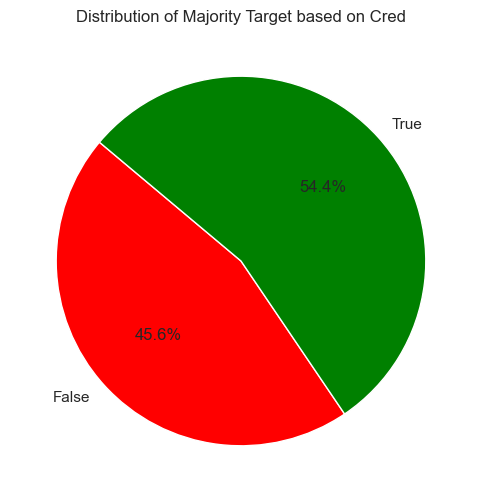

In [73]:
#Plotting the sum of cred for a tweet which is true and false using pie chart

# Grouping and summing the cred by majority_target
sum_cred = twitter_data.groupby('majority_target')['cred'].sum().reset_index()

# Define colors
colors = ['red', 'green']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sum_cred['cred'], labels=sum_cred['majority_target'], colors=colors, autopct='%1.1f%%', startangle=140)

# Adding titles
plt.title('Distribution of Majority Target based on Cred')

plt.show()

### Noise in tweets
+ remove mentions
+ remove hashtags
+ remove urls
+ remove emojis
+ remove special character

In [ ]:
# Checking first 5 records in Tweet attribute to check the noise on data

twitter_data['tweet'].head(5)

0                     @POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?
1    @S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?\n\nMeanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.\n\nFuck off with this corporatist propaganda.
2                                                                                         THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!
3                      @POTUS Biden Blunders\n\nBroken campaign 

In [ ]:
#Importing wordcloud library to create wordcloud object from tweets

!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
# Create a WordCloud object

text_data = twitter_data['tweet'].str.cat(sep='')
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(text_data)

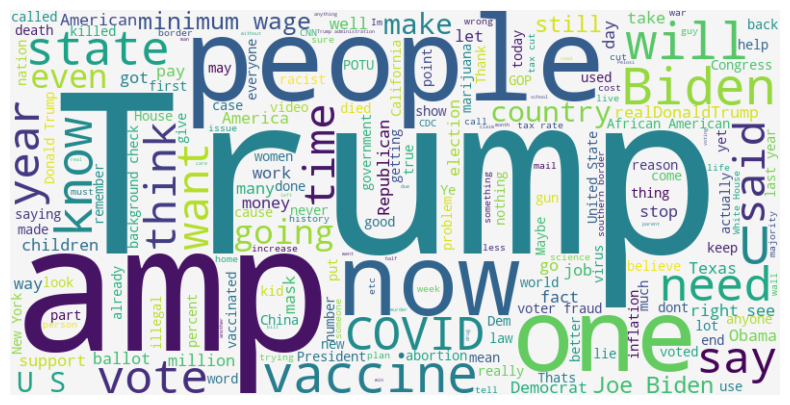

In [ ]:
# Display the word cloud for uncleaned tweet using Matplotlib

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Noise Cleaning

In [75]:
#Converting every text to lowercase for better efficiency

twitter_data['clean_tweet'] = twitter_data['tweet'].str.lower()

In [76]:
twitter_data[['tweet','clean_tweet']].head()

,tweet,clean_tweet
0,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?","@potus biden blunders - 6 month update\n\ninflation, delta mismanagement, covid for kids, abandoning americans in afghanistan, arming the taliban, s. border crisis, breaking job growth, abuse of power (many exec orders, $3.5t through reconciliation, eviction moratorium)...what did i miss?"
1,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?\n\nMeanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.\n\nFuck off with this corporatist propaganda.","@s0sickrick @stairmaster_ @6d6f636869 not as many people are literally starving and out in the streets as they were in the 19th century. isnt capitalism grand?\n\nmeanwhile, were facing an eviction moratorium threatening to make millions of americans homeless.\n\nfuck off with this corporatist propaganda."
2,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!,the supreme court is siding with super rich property owners and over poor struggling americans by blocking the eviction moratorium during a pandemic which isn't even over yet. assholes! get ready for more homeless people!
3,"@POTUS Biden Blunders\n\nBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)","@potus biden blunders\n\nbroken campaign promises, inflation, delta mismanagement, dems without leadership, abandoned americans &amp; armed the taliban, s. border crisis, breaking job growth, abuse of power (61 exec orders, $1.9t+ in reconciliation, eviction moratorium, vaccine mandates)"
4,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF.","@ohcomfy i agree. the confluence of events right now is unprecedented (afghan disaster, bombing, overturning of the eviction moratorium, collapse of biden admin credibility). if images come out of americans being executed by taliban, shtf."


In [74]:
# Installing Loading Text Cleaning Package

!pip install neattext
import neattext.functions as nfx

In [ ]:
# Methods available in nfx

dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [83]:
# Extracting hastags from Tweet attribute

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_hashtags)))

[['#padp8670'],
 ['#doj@thejusticedept',
  '#instructing',
  '#supreme#court',
  '#do#not#block',
  '#new#eviction',
  '#moratorium',
  '#americans',
  '#depend',
  '#earnings',
  '#investments',
  '#admitted',
  '#unconstitutional'],
 ['#supremecourt', '#covid19', '#congress'],
 ['#m4a'],
 ['#scotus..#covid19..'],
 ['#scotus'],
 ['#ampfw'],
 ['#ksarescue,', '#ida,'],
 ['#news20at5'],
 ['#impeachbiden', '#bidenbordercrisis!', '#impeach'],
 ['#unemployment', '#pua'],
 ['#covid', '#neverforget'],
 ['#scotus', '#extendthemoratorium.'],
 ['#potus'],
 ['#shitlibs'],
 ['#republicans',
  '#democrats',
  '#congress',
  '#biden',
  '#evictions',
  '#hotel',
  '#travel'],
 ['#bidenmustgo'],
 ['#impeachment,', '#impeachbidennow'],
 ['#wakeupamerica'],
 ['#scotus'],
 ['#scotus'],
 ['#pleasehearus', '#extendui', '#evictionmoratorium'],
 ['#tuesdaymotivations'],
 ['#trump'],
 ['#disabled', '#workfromhome'],
 ['#evictionmoratorium', '#americanhorrorstory', '#america', '#usa'],
 ['#scotus'],
 ['#homel

In [84]:
# Cleaning tweets by removing hashtags and storing the results in Clean Tweet attribute

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(nfx.remove_hashtags)

In [85]:
# Verifying hastags from new clean tweet attribute

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_hashtags)))

[]

As a result, we no longer have any #Hashtag in Clean Tweet. Similarly, we can follow the same steps for every noise in our tweets.

In [87]:
# Extracting userhandles from Tweet attribute

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_userhandles)))

[['@potus'],
 ['@s0sickrick', '@stairmaster_', '@6d6f636869'],
 ['@potus'],
 ['@ohcomfy'],
 ['@thomas1774paine', '@joebiden', '@joebiden', '@thejusticedept'],
 ['@socialismisdone', '@theekhivequeenb'],
 ['@daysofarelives2', '@sen_joemanchin'],
 ['@aplemkseriously', '@coribush', '@coribush'],
 ['@lindakmills1'],
 ['@riguy_453', '@paulsorrentino3', '@potus'],
 ['@andrear03428969'],
 ['@dhiggins63'],
 ['@anthonyzenkus'],
 ['@jim_jordan'],
 ['@potus'],
 ['@jim_jordan'],
 ['@jeff_a_martin', '@lesbionicamazon', '@krystalball', "@aoc's", '@aoc,'],
 ['@legionsocialist', '@left_footin', '@empirefiles'],
 ['@whitehouse'],
 ['@claudiatenney', '@lavern_spicer'],
 ['@joannkennedycan',
  '@mainesocialist',
  '@newscentermaine',
  '@fbiwhistlestop',
  '@aliciafornewton',
  '@miriamwasser',
  '@kirkcarapezza',
  '@danhornnews',
  '@witchyalice6',
  '@inaniloquence',
  '@ferc',
  '@mayorbyrd',
  '@strikedebt'],
 ['@patriotmirror', '@rudygiuliani'],
 ['@mondairejones'],
 ['@philarballo', '@ghardin68'],


In [88]:
# Removing mentions

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(nfx.remove_userhandles)

In [89]:
#Comparing the clean data with uncleaned data

twitter_data[['tweet','clean_tweet']][90000:90005]

,tweet,clean_tweet
90000,@MerricourtL Ronald Reagan raised taxes 11 times as POTUS &amp; tripled the national debt. Learn something about him before you speak stupidly.,ronald reagan raised taxes 11 times as potus &amp; tripled the national debt. learn something about him before you speak stupidly.
90001,You know who actually gave amnesty to millions of illegal immigrants &amp; raised taxes repeatedly? Ronald Reagan. #CNNDebate #GOPDebate,you know who actually gave amnesty to millions of illegal immigrants &amp; raised taxes repeatedly? ronald reagan.
90002,@JWernholm @briebriejoy People dont mind paying when the taxes raised are used for the publics good. American politicians starting with Ronald Reagan have been serving only the interests of the wealthy.,people dont mind paying when the taxes raised are used for the publics good. american politicians starting with ronald reagan have been serving only the interests of the wealthy.
90003,@kylegriffin1 @ALT_DOJ Of course she doesn't use them correctly. Ronald Reagan--considered super conservative when I was in HS--raised taxes. I bet Loeffler and the Foxies would label him a socialist and Marxist.,of course she doesn't use them correctly. ronald reagan--considered super conservative when i was in hs--raised taxes. i bet loeffler and the foxies would label him a socialist and marxist.
90004,@fitzgibbler Ronald Reagan literally raised taxes so much I don't understand why republicans love him,ronald reagan literally raised taxes so much i don't understand why republicans love him


As a result, we no longer have any @Mention in Clean Tweet

In [90]:
# remove white space

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [92]:
# Extracting URLs from Tweets
list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_urls)))

[['www.newsmax.comjun'],
 ['www.thegatewaypundit.comdec'],
 ['www.bizpacreview.comoct'],
 ['https://www.thegatewaypundit'],
 ['http://www.patriotradionetwo'],
 ['https://www.washingtonexaminer'],
 ['https://www.distributednews'],
 ['https://healthandmoneynews.wor'],
 ['http://217.218.67.23'],
 ['https://www.thegatewaypundit']]

In [93]:
# removing urls

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(nfx.remove_urls)

In [94]:
# Checking URLs in Clean Tweets

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_urls)))

[]

In [95]:
# removing punctuations(punctuations such as fullstop,comma,exclamation marks and question mark)

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(nfx.remove_puncts)

In [96]:
# removing accents

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(nfx.remove_accents)

In [97]:
# removing numbers

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(nfx.remove_numbers)

In [98]:
# Extracting Emojis from Tweets

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_emojis)))

[]

In [99]:
# Removing Emojis by replacing unicode characters to '' using Regular Expression

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [100]:
# Checking Emojis in Clean Tweets

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_emojis)))

[]

In [102]:
# Checking special characters in Tweets

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_special_characters)))

[['(', '$', ')'],
 ['(', '$', '+', ')'],
 ['(', ')'],
 ['*', '*'],
 ['\n~', '~', '\n', '\n', '\n~', '~'],
 ['(', ')'],
 [':'],
 ['\n'],
 [':', '$'],
 ['(', ')', '$'],
 ['\n', '\n', '\n', '\n'],
 [':'],
 [':'],
 ['(', ')'],
 ['/'],
 ['+'],
 ['*', '*'],
 ['(', ')', '(', ')'],
 [':', '\n'],
 ['%'],
 [':'],
 ['/'],
 [':', ':'],
 ['(', '$', ')'],
 ['(', '$', '+', ')'],
 ['\n', '\n', '\n', '@', '$', '\n', '\n', '+', '\n', '\n'],
 ['\n', '\n', '\n'],
 ['/', '/'],
 ['%'],
 ['/'],
 ['$$', '+', '\n'],
 [':\n', '\n', '(', ')\n', '\n'],
 ['\n', '\n', '\n', ':', '\n'],
 ['(', '$', '+', ')'],
 ['%'],
 ['(', ')'],
 ['/', '/', '/', '/'],
 [':', '/', '/$+'],
 ['\n', '\n', '/'],
 ['(', '%', ')'],
 ['+'],
 [':'],
 ['%'],
 [':'],
 ['/'],
 [':'],
 [':', '|', ':'],
 ['\n', '\n', '\n', '\n'],
 ['\n', '\n', '\n'],
 [':'],
 ['\n', '\n'],
 [':'],
 ['%', '$'],
 ['\n'],
 ['(', ')'],
 ['(', '$', ')'],
 ['/'],
 ['/'],
 ['%'],
 ['/'],
 ['/'],
 ['='],
 [':', '$', '$'],
 ['%'],
 ['$'],
 [':'],
 [':', '/', '/', '/'],
 

In [103]:
# Removing special characters

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: nfx.remove_special_characters(x))

In [104]:
# Verifying special characters in Tweets

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_special_characters)))

[]

In [105]:
# Replacing words to have more meaningful impact

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('cant','can not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('isnt','is not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('didnt','did not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('shallnt','shall not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('shouldnt','should not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('dont','do not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('couldnt','could not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('doesnt','does not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('willnt','will not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('wouldnt','would not'))
twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: x.replace('thats','that is'))

In [108]:
# Checking stop words in Tweets

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_stopwords)))

[['for', 'in', 'the', 's', 'of', 't', 'through', 'did', 'i'],
 ['not',
  'as',
  'are',
  'and',
  'out',
  'in',
  'the',
  'as',
  'they',
  'were',
  'in',
  'the',
  'is',
  'not',
  'were',
  'an',
  'to',
  'of',
  'off',
  'with',
  'this'],
 ['the',
  'is',
  'with',
  'and',
  'over',
  'by',
  'the',
  'during',
  'a',
  'which',
  'is',
  'not',
  'over',
  'for',
  'more'],
 ['the', 's', 'of', 't', 'in'],
 ['i',
  'the',
  'of',
  'now',
  'is',
  'of',
  'the',
  'of',
  'if',
  'out',
  'of',
  'being',
  'by'],
 ['this',
  'before',
  'but',
  'it',
  'is',
  'the',
  'in',
  'which',
  'has',
  'out',
  'the',
  'that',
  'are',
  'in',
  'from',
  'to',
  'the',
  'to'],
 ['as',
  'can',
  'that',
  'the',
  'was',
  'a',
  'and',
  'not',
  'a',
  'to',
  'the',
  'of',
  'in',
  'the',
  'and'],
 ['on'],
 ['its', 'a', 'for', 'not', 'about', 'do', 'that', 'no', 'what', 'with', 'of'],
 ['there',
  'is',
  'not',
  'and',
  'has',
  'been',
  'in',
  'the',
  'has',
  '

In [109]:
# Removing stop words

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: nfx.remove_stopwords(x))

In [110]:
# Verifying stop words in Tweets

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_stopwords)))

[]

In [112]:
# Checking short words in Tweets

list(filter(None,twitter_data['clean_tweet'].apply(nfx.extract_shortwords)))

[['job'],
 ['th'],
 ['amp', 'job'],
 ['ive', 'way'],
 ['amp'],
 ['win'],
 ['let', 'ran'],
 ['rt'],
 ['aid', 'pay'],
 ['b'],
 ['amy'],
 ['amp', 'tax'],
 ['die'],
 ['gym', 'amp', 'amp'],
 ['amp', 'vax', 'cdc', 'vax', 'id', 'id'],
 ['hud', 'sec'],
 ['gee'],
 ['aoc'],
 ['tax', 'owe'],
 ['cdc', 'use'],
 ['new', 'day', 'act'],
 ['lee', 'dca'],
 ['bad'],
 ['ask', 'tds'],
 ['ubi', 'ubi'],
 ['lie'],
 ['let'],
 ['cut'],
 ['aoc'],
 ['etc'],
 ['pua'],
 ['way'],
 ['tbh'],
 ['law', 'hes', 'amp'],
 ['act', 'cdc', 'law'],
 ['cut'],
 ['ebt', 'hid', 'got', 'op'],
 ['cdc'],
 ['rt', 'use'],
 ['job', 'job'],
 ['c'],
 ['hes', 'try'],
 ['let', 'sue'],
 ['job'],
 ['end'],
 ['new'],
 ['end'],
 ['gop'],
 ['im'],
 ['use', 'u', 'job', 'f'],
 ['ytd', 'amp', 'job'],
 ['tho'],
 ['pay', 'use'],
 ['cic', 'bad'],
 ['wtf', 'vax', 'tax', 'ffs'],
 ['ago', 'usa'],
 ['ppl', 'pay'],
 ['lot', 'rn'],
 ['amp', 'amp', 'im', 'old'],
 ['new', 'let'],
 ['jan', 'ya'],
 ['amp', 'job'],
 ['aid', 'big', 'pay'],
 ['law'],
 ['day', 'amp'

In [113]:
# Removing short words

twitter_data['clean_tweet'] = twitter_data['clean_tweet'].apply(lambda x: nfx.remove_shortwords(x))

In [114]:
# Verifying short words

list(filter(None,twitter_data['clean_tweet'].apply(lambda x: nfx.extract_shortwords(x))))

[[''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [ ]:
#Comparing the noisy tweets vs cleaned tweets

twitter_data[['tweet','clean_tweet']]

,tweet,clean_tweet
0,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?",biden blunders month update inflation delta mismanagement covid kids abandoning americans afghanistan arming taliban border crisis breaking growth abuse power exec orders reconciliation eviction moratoriumwhat miss
1,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?\n\nMeanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.\n\nFuck off with this corporatist propaganda.",people literally starving streets century capitalism grand facing eviction moratorium threatening millions americans homeless fuck corporatist propaganda
2,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!,supreme court siding super rich property owners poor struggling americans blocking eviction moratorium pandemic assholes ready homeless people
3,"@POTUS Biden Blunders\n\nBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)",biden blunders broken campaign promises inflation delta mismanagement dems leadership abandoned americans armed taliban border crisis breaking growth abuse power exec orders reconciliation eviction moratorium vaccine mandates
4,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF.",agree confluence events right unprecedented afghan disaster bombing overturning eviction moratorium collapse biden admin credibility images come americans executed taliban shtf
...,...,...
134193,"Joe Biden's family owned African slaves....\n\nJoe Biden's great-grandfather, Joseph J. Biden (1828-1880) was a slave owner and fought for the Confederate States of America....",bidens family owned african slaves bidens greatgrandfather joseph biden slave owner fought confederate states america
134194,"Joe Bidens great, great grandfather was a slave owner.\n\nHis family owned 12 slaves.",bidens great great grandfather slave owner family owned slaves
134195,"@ChevyChaseToGo ""Joe Bidens great-grandfather Joseph J. Biden (1828-1880) was a slave-owner and fought for the Confederate States of America",bidens greatgrandfather joseph biden slaveowner fought confederate states america
134196,@JoeBiden Facts are Bidens VP Kamala Harris Great Great Grandfather was Hamilton Brown a Prominent Successful Slave Plantation Owner and Slave Driver in Jamaica. So Proud Biden chose a VP that comes from a Slave Driving Family as an example of US American History.,facts bidens kamala harris great great grandfather hamilton brown prominent successful slave plantation owner slave driver jamaica proud biden chose comes slave driving family example american history


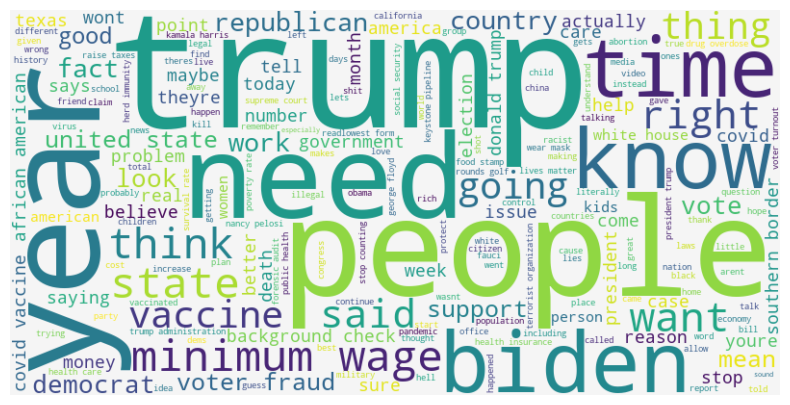

In [ ]:
#Making wordcloud of clean tweets after processing
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(twitter_data['clean_tweet'].str.cat(sep=''))

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Sentiment Analysis

In [ ]:
# Installing and importing Vader sentiment for determing the polarity score to know the sentiment according to tweets

!pip install vadersentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

In [ ]:
# Testing the indexed 1 tweet for polarity score

SentimentIntensityAnalyzer().polarity_scores(twitter_data['tweet'][1])

{'neg': 0.311, 'neu': 0.689, 'pos': 0.0, 'compound': -0.9449}

In [ ]:
# Initialize the SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Apply the sentiment intensity analyzer to the tweet to create a new 'polarity_scores' column

twitter_data['polarity_score'] = twitter_data['tweet'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
twitter_data['polarity_score']

0          {'neg': 0.298, 'neu': 0.653, 'pos': 0.05, 'compound': -0.9169}
1           {'neg': 0.311, 'neu': 0.689, 'pos': 0.0, 'compound': -0.9449}
2         {'neg': 0.292, 'neu': 0.457, 'pos': 0.252, 'compound': -0.3147}
3          {'neg': 0.276, 'neu': 0.576, 'pos': 0.147, 'compound': -0.828}
4         {'neg': 0.235, 'neu': 0.708, 'pos': 0.057, 'compound': -0.8316}
                                       ...                               
134193      {'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'compound': -0.3182}
134194       {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.8481}
134195      {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.3182}
134196       {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.9601}
134197         {'neg': 0.11, 'neu': 0.63, 'pos': 0.26, 'compound': 0.726}
Name: polarity_score, Length: 134198, dtype: object

In [ ]:
# Extract the compound score (overall sentiment intensity) from the polarity_scores

twitter_data['compound_score'] = twitter_data['polarity_score'].apply(lambda x: x['compound'])

In [ ]:
#Defining the sentiment from the compound score while setting the threshold of +-0.3

twitter_data['sentiment'] = twitter_data['compound_score'].apply(lambda x: 'Positive' if x > 0.3 else ('Negative' if x < -0.3 else 'Neutral'))
twitter_data['sentiment']

0         Negative
1         Negative
2         Negative
3         Negative
4         Negative
            ...   
134193    Negative
134194    Positive
134195    Negative
134196    Positive
134197    Positive
Name: sentiment, Length: 134198, dtype: object

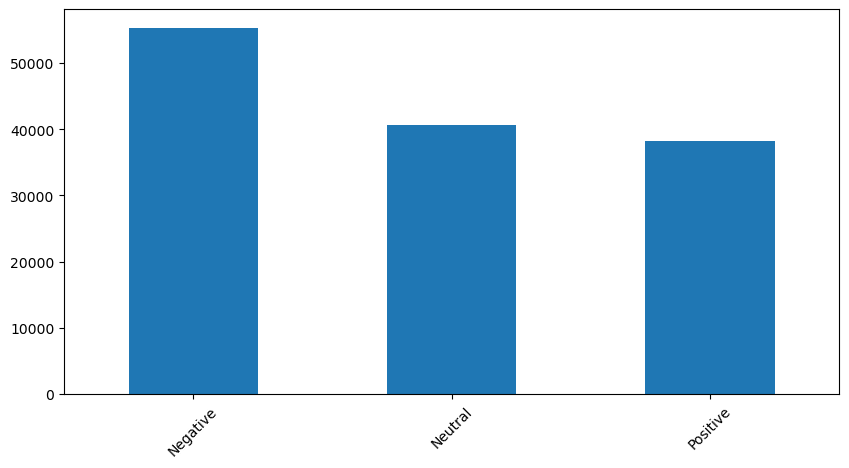

In [ ]:
# Plotting count of Sentiments 

plt.figure(figsize = (10,5))
twitter_data['sentiment'].value_counts().plot(kind='bar')
plt.xticks(rotation = 45)
plt.savefig("Sentiment.png")
plt.show()

(array([17745., 17669., 14159., 12326.,  7367., 21184., 10977., 13507.,
        11830.,  7434.]),
 array([-0.9938 , -0.79576, -0.59772, -0.39968, -0.20164, -0.0036 ,
         0.19444,  0.39248,  0.59052,  0.78856,  0.9866 ]),
 <BarContainer object of 10 artists>)

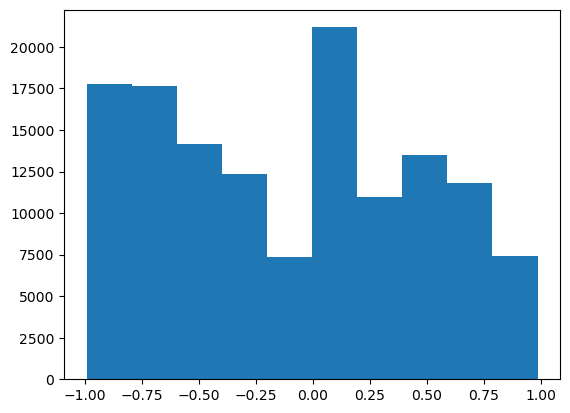

In [ ]:
plt.hist(twitter_data['compound_score'])

In [ ]:
#Mapping the sentiment with tweets 

twitter_data[['tweet','sentiment']][50005:50010]

,tweet,sentiment
50005,"@NJTommci @MFBinFL @EssexPR MRNA is genetic material. \nMan made. \nThat genetic material enters your cell to instruct it to do something. \nThere's no long term data as to what effect it will have on your body. \nIt IS gene therapy, they admit it. \nThey changed the meaning of vaccine,to cover these jabs",Neutral
50006,"@white_king88 Add the whole clips mate, anyone can take sentences out of context.\n\nThey are discussing a gene therapy, yes, but, the extended clip will show you that that is not the vaccine, it is a potential therapy that they will build using mRNA.\n\nFull clip?",Neutral
50007,@popeyetheselle1 @Rhymhoont @Jyspook @7d0648b92562448 @samanthamarika1 Gene therapy huh smooth brain. Tell us all how an mRNA vaccine is gene therapy. \n\nIll wait.,Negative
50008,"@MatthewRozsa @Salon The so called covid vaccine, is not a vaccine. It is a mRNA gene therapy.",Neutral
50009,@Marc_Elrich @ClimateSt @energysmartohio @EfficiencyLast @Jonathan_Breen @MLCleaningUp @JigarShahDC @onegoodleap Please dont vaccine our children in our county! mRNA vaccine IS NOT a vaccine! It is a gene therapy drug,Positive


In [ ]:
#Let's check if our final dataset before modelling is somehow correlated with each other or not after populating sentiment of tweets

correlation_matrix = twitter_data.corr()

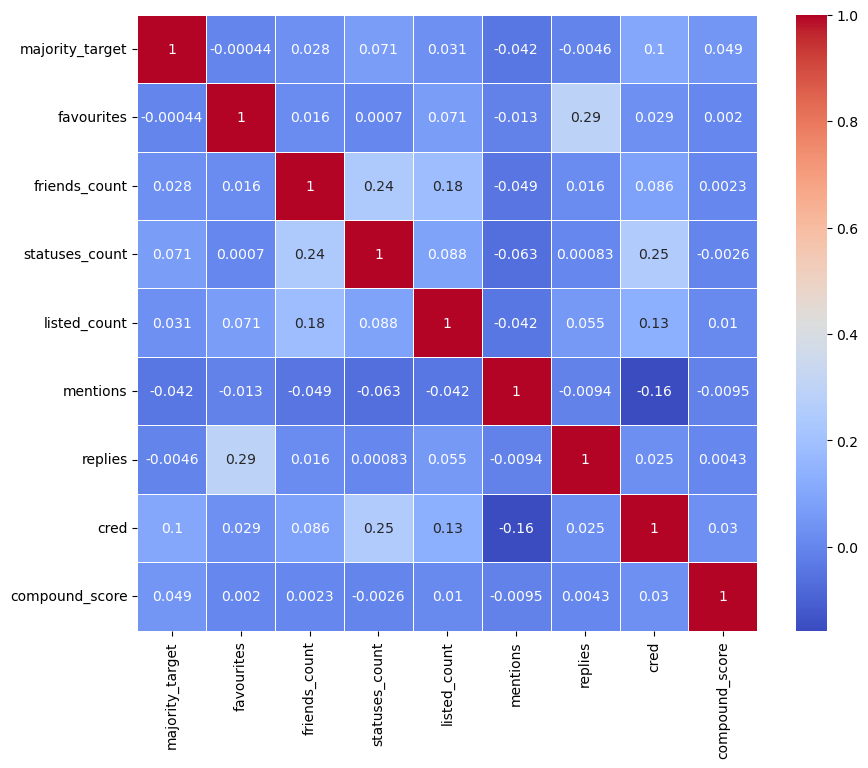

In [ ]:
# Set the figure size for better visualization.
plt.figure(figsize=(10, 8))

# Generate the heatmap using seaborn.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot.
plt.show()

Additonal Tokenzation for getting insights into positive, negative, and neutral tweets

Divide the raw text into meaningful units that can be further analyzed and processed while counting the repeating words

In [ ]:
# Import Counter function to get most common Keyword

from collections import Counter

# Tokenization and counting the repetitive words while saving into dictionary

def TokenizeAndCount(data):
    processed = []
    for i in data:
        for token in i.split():
            processed.append(token)
    count = Counter(processed)
    result = dict(count.most_common(200))
    return result

In [ ]:
#Segregate the sentiments to different attributes for further illustration

PositiveTweet = list(twitter_data[twitter_data['sentiment']=='Positive']['clean_tweet'])
NegativeTweet = list(twitter_data[twitter_data['sentiment']=='Negative']['clean_tweet'])
NeutralTweet = list(twitter_data[twitter_data['sentiment']=='Neutral']['clean_tweet'])

In [ ]:
PositiveTweet[0:5]

['fromthese',
 'americansim worried taking credit theyll matter like extension eviction moratorium',
 'going extend eviction moratorium start automatic deposits child credit year going rough americans evicted taxes instead getting refund',
 'recent eviction moratorium good example action looks good schumer hugging honestly losers situation americans respect action stop',
 'biden kept extending eviction moratorium increased benefits press confidence levels tanked laughing stock world americans killed afganis wanted foto']

In [ ]:
TokenizeAndCount(PositiveTweet)

{'trump': 6879,
 'people': 4724,
 'like': 4572,
 'biden': 4392,
 'states': 2728,
 'covid': 2631,
 'vaccine': 2438,
 'support': 2239,
 'said': 2134,
 'years': 2035,
 'know': 1997,
 'americans': 1971,
 'time': 1824,
 'good': 1795,
 'jobs': 1779,
 'need': 1738,
 'president': 1732,
 'want': 1726,
 'taxes': 1704,
 'right': 1693,
 'obama': 1681,
 'united': 1680,
 'wage': 1678,
 'income': 1663,
 'rate': 1652,
 'money': 1645,
 'think': 1480,
 'world': 1463,
 'minimum': 1462,
 'year': 1438,
 'care': 1433,
 'going': 1415,
 'million': 1395,
 'great': 1379,
 'free': 1338,
 'wealth': 1318,
 'state': 1305,
 'health': 1291,
 'children': 1290,
 'election': 1289,
 'american': 1284,
 'vote': 1275,
 'country': 1233,
 'better': 1209,
 'family': 1159,
 'black': 1140,
 'america': 1138,
 'federal': 1132,
 'court': 1088,
 'help': 1079,
 'increase': 1079,
 'white': 1076,
 'paid': 1050,
 'work': 1028,
 'votes': 1015,
 'texas': 982,
 'rule': 959,
 'students': 950,
 'marijuana': 943,
 'immunity': 926,
 'sure': 91

In [ ]:
#Assigning dataframe for each sentiment dictionary

pos = pd.DataFrame(TokenizeAndCount(PositiveTweet).items(),columns=['Word','Count'])
neg = pd.DataFrame(TokenizeAndCount(NegativeTweet).items(),columns=['Word','Count'])
neu = pd.DataFrame(TokenizeAndCount(NeutralTweet).items(),columns=['Word','Count'])

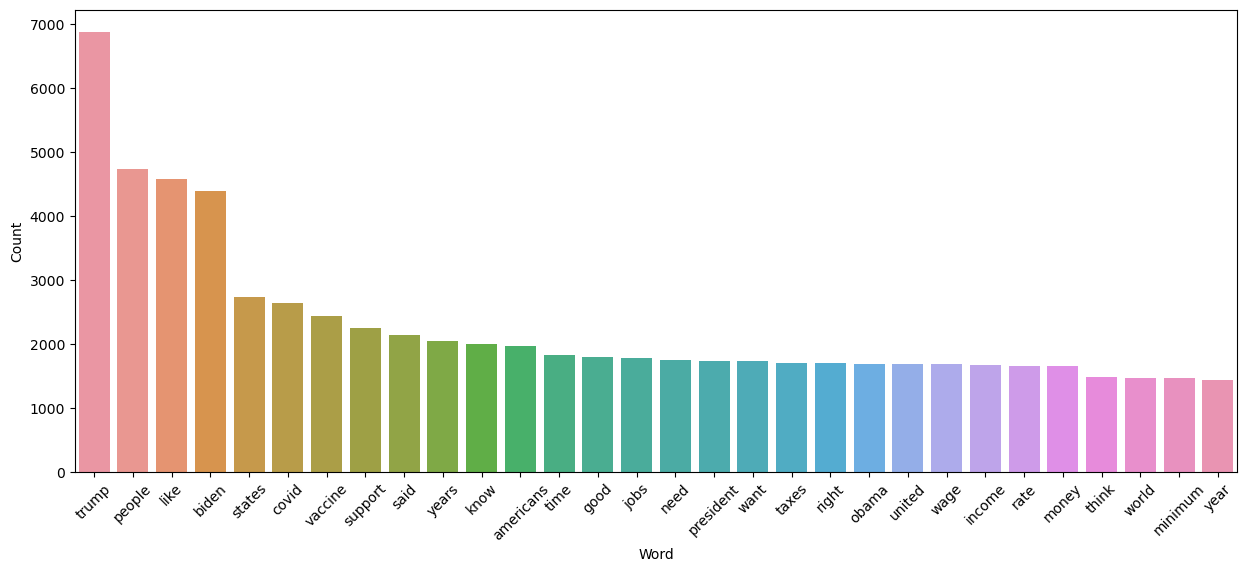

In [ ]:
# Seaborn plot of most repeating positve tweets

import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x=pos['Word'][0:30], y=pos['Count'][0:30])
plt.xticks(rotation=45)
plt.show()

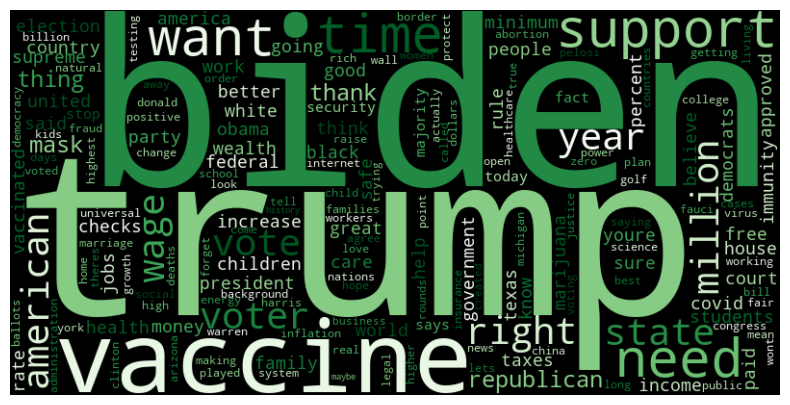

In [ ]:
#Making wordcloud of Positive tweets words (top 30)

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap="Greens").generate(pos['Word'].str.cat(sep=' '))

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

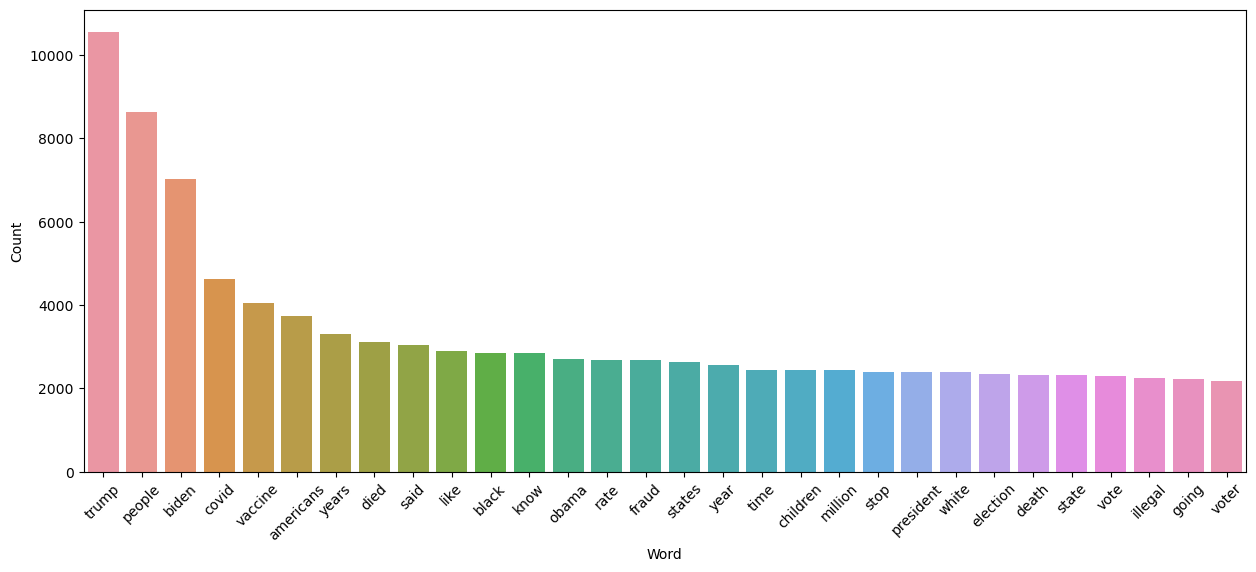

In [ ]:
# Seaborn plot of most repeating negative tweets

plt.figure(figsize=(15, 6))
sns.barplot(x=neg['Word'][0:30], y=neg['Count'][0:30])
plt.xticks(rotation=45)
plt.show()

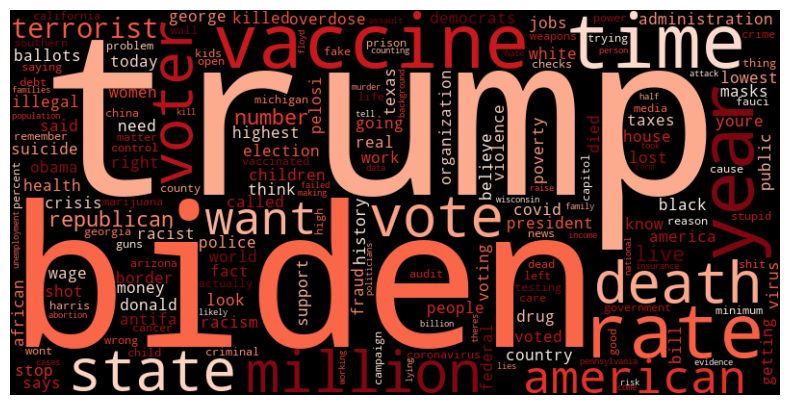

In [ ]:
#Making wordcloud of Negative tweets words (top 30)

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap="Reds").generate(neg['Word'].str.cat(sep=' '))

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

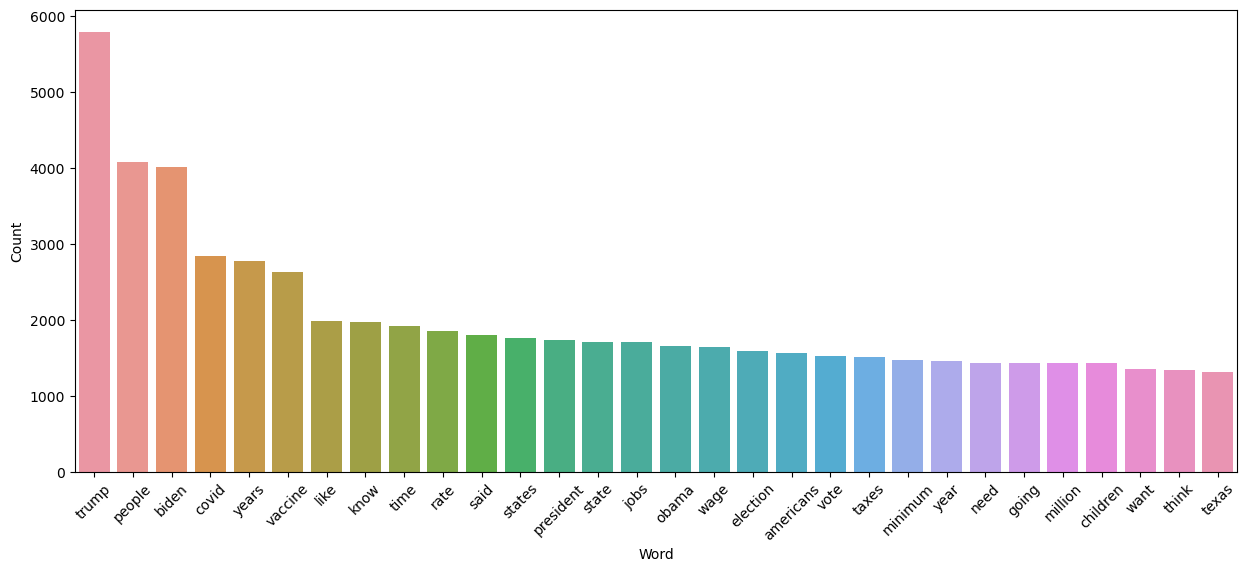

In [ ]:
# Seaborn plot of most repeating neutral tweets

plt.figure(figsize=(15, 6))
sns.barplot(x=neu['Word'][0:30], y=neu['Count'][0:30])
plt.xticks(rotation=45)
plt.show()

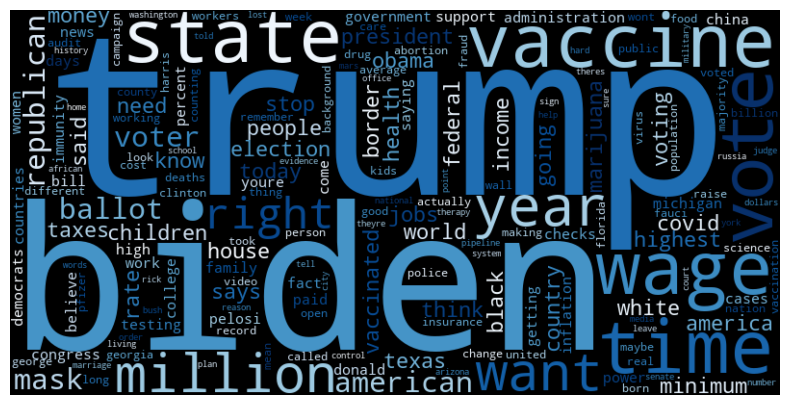

In [ ]:
#Making wordcloud of Neutral tweets words (top 30)

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap="Blues").generate(neu['Word'].str.cat(sep=' '))

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Drawing Insights into particular topics

In [ ]:
import regex as re

In [ ]:
biden=twitter_data[twitter_data.tweet.str.contains(r'biden', flags=re.IGNORECASE,na=False ,regex=True)]
trump=twitter_data[twitter_data.tweet.str.contains(r'trump', flags=re.IGNORECASE,na=False ,regex=True)]
vaccine=twitter_data[twitter_data.tweet.str.contains(r'vaccine', flags=re.IGNORECASE,na=False ,regex=True)]
marijuana=twitter_data[twitter_data.tweet.str.contains(r'marijuana', flags=re.IGNORECASE,na=False ,regex=True)]

Text(0.5, 1.0, 'Sentiments Results for Popular topics')

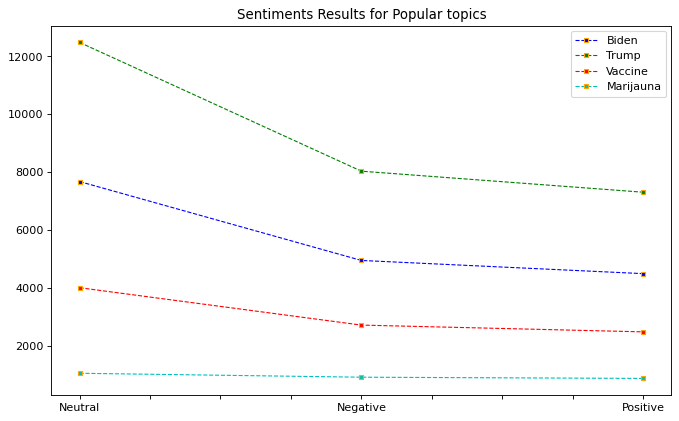

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

biden['sentiment'].value_counts().plot(marker='s', c='b', ls='--', lw=1, ms=4, mew=1, mec='orange')
trump['sentiment'].value_counts().plot(marker='s', c='g', ls='--', lw=1, ms=4, mew=1, mec='orange')
vaccine['sentiment'].value_counts().plot(marker='s', c='r', ls='--', lw=1, ms=4, mew=1, mec='orange')
marijuna['sentiment'].value_counts().plot(marker='s', c='c', ls='--', lw=1, ms=4, mew=1, mec='orange')
plt.legend(['Biden', 'Trump','Vaccine','Marijauna'])

plt.title('Sentiments Results for Popular topics')

Lets dig more into Trump

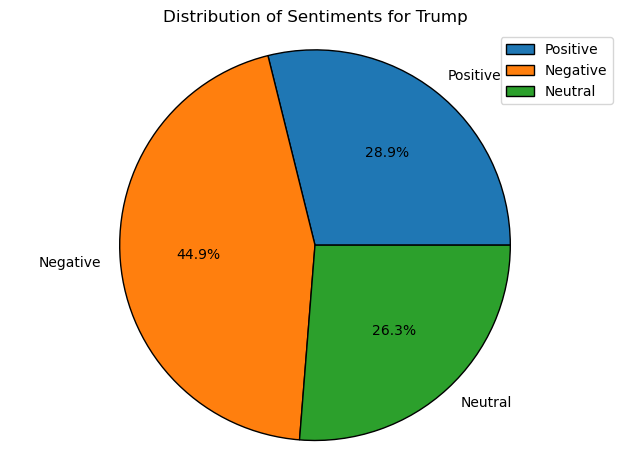

In [ ]:
Positive=trump[trump['sentiment']=='Positive'].shape[0]
Negative=trump[trump['sentiment']=='Negative'].shape[0]
Neutral=trump[trump['sentiment']=='Neutral'].shape[0]

slices=[Positive,Negative,Neutral]
labels=['Positive','Negative','Neutral']
plt.pie(slices,labels=labels,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.axis('equal')
plt.title("Distribution of Sentiments for Trump")
plt.legend() 
plt.tight_layout() ## for default padding
plt.show()


In [ ]:
neg = trump[trump.sentiment =='Negative']

In [ ]:
neg[neg.majority_target == True].head()

,majority_target,tweet,favourites,friends_count,statuses_count,listed_count,mentions,replies,cred,clean_tweet,polarity_score,compound_score,sentiment
16,True,"@AndreaR03428969 People vote with their pockets. Working class Americans (especially Obama-Trump-Biden voters) will remember that extra money from Trump, Bidens reconciliation failure &amp; $15 minimum wage failure, the ending of child tax benefits and eviction moratorium, and vote for Trump again.",1.0,657.0,6590.0,343.0,1.0,0.0,0.992794,people vote pockets working class americans especially obamatrumpbiden voters remember extra money trump bidens reconciliation failure minimum wage failure ending child benefits eviction moratorium vote trump,"{'neg': 0.195, 'neu': 0.752, 'pos': 0.053, 'compound': -0.7906}",-0.7906,Negative
27,True,"@claudiatenney @lavern_spicer CDC has lost all credibility first over their handling of COVID after trump left office, now this absolutely ridiculous move on the eviction moratorium..the fact they even tried this should scare most Americans as they will use any non-ethical means to destroy us",0.0,63.0,626.0,0.0,2.0,0.0,0.045455,lost credibility handling covid trump left office absolutely ridiculous eviction moratoriumthe fact tried scare americans nonethical means destroy,"{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.9299}",-0.9299,Negative
32,True,@PatriotMirror @RudyGiuliani You bots are pathetic. Ask Chicago where the million dollar refund is? Trump pays his but he is still living rent free in your head. Obviously the eviction moratorium includes those who suffer from TDS too. Of course Rudy read the bill. Most Americans who care did!,1.0,1412.0,2731.0,0.0,2.0,2.0,0.427413,bots pathetic chicago million dollar refund trump pays living rent free head obviously eviction moratorium includes suffer course rudy read bill americans care,"{'neg': 0.177, 'neu': 0.682, 'pos': 0.142, 'compound': -0.3064}",-0.3064,Negative
51,True,"@SpeakerPelosi You were so concerned about a partisan committee on January 6 that you forgot to do your job and help Americans by extending the eviction moratorium. You need to stop wasting your time with Trump, because youre not doing your job!",0.0,202.0,353.0,0.0,1.0,0.0,0.081818,concerned partisan committee january forgot help americans extending eviction moratorium need stop wasting time trump youre,"{'neg': 0.168, 'neu': 0.777, 'pos': 0.055, 'compound': -0.6696}",-0.6696,Negative
59,True,"@jjz1600 @johncusack While so many Americans are struggling to keep roofs over their heads with Mortgage Eviction Moratorium expiring, and still struggling to find jobs, and deal with crazy Trump neighbors refusing to get immunized or wear masks.so disappointed in his tone deafness.",0.0,1756.0,49598.0,0.0,2.0,0.0,0.444480,americans struggling roofs heads mortgage eviction moratorium expiring struggling find jobs deal crazy trump neighbors refusing immunized wear masksso disappointed tone deafness,"{'neg': 0.312, 'neu': 0.688, 'pos': 0.0, 'compound': -0.9413}",-0.9413,Negative


In [ ]:
twitter_data.head()

,majority_target,tweet,favourites,friends_count,statuses_count,listed_count,mentions,replies,cred,clean_tweet,polarity_score,compound_score,sentiment
0,True,"@POTUS Biden Blunders - 6 Month Update\n\nInflation, Delta mismanagement, COVID for kids, Abandoning Americans in Afghanistan, Arming the Taliban, S. Border crisis, Breaking job growth, Abuse of power (Many Exec Orders, $3.5T through Reconciliation, Eviction Moratorium)...what did I miss?",10.0,3619.0,16423.0,44.0,1.0,1.0,0.540794,biden blunders month update inflation delta mismanagement covid kids abandoning americans afghanistan arming taliban border crisis breaking growth abuse power exec orders reconciliation eviction moratoriumwhat miss,"{'neg': 0.298, 'neu': 0.653, 'pos': 0.05, 'compound': -0.9169}",-0.9169,Negative
1,True,"@S0SickRick @Stairmaster_ @6d6f636869 Not as many people are literally starving and out in the streets as they were in the 19th century. Isnt capitalism grand?\n\nMeanwhile, were facing an eviction moratorium threatening to make millions of Americans homeless.\n\nFuck off with this corporatist propaganda.",1.0,1621.0,37184.0,64.0,3.0,0.0,0.462177,people literally starving streets century capitalism grand facing eviction moratorium threatening millions americans homeless fuck corporatist propaganda,"{'neg': 0.311, 'neu': 0.689, 'pos': 0.0, 'compound': -0.9449}",-0.9449,Negative
2,True,THE SUPREME COURT is siding with super rich property owners and over poor struggling AMERICANS by blocking the eviction moratorium during a pandemic which isn't even over yet. ASSHOLES! get ready for more homeless people!,0.0,84.0,1184.0,0.0,0.0,5.0,0.096774,supreme court siding super rich property owners poor struggling americans blocking eviction moratorium pandemic assholes ready homeless people,"{'neg': 0.292, 'neu': 0.457, 'pos': 0.252, 'compound': -0.3147}",-0.3147,Negative
3,True,"@POTUS Biden Blunders\n\nBroken campaign promises, Inflation, Delta mismanagement, Dems without leadership, Abandoned Americans &amp; Armed the Taliban, S. Border crisis, Breaking job growth, Abuse of power (61 Exec Orders, $1.9T+ in Reconciliation, Eviction Moratorium, Vaccine Mandates)",0.0,3619.0,16423.0,44.0,1.0,0.0,0.540794,biden blunders broken campaign promises inflation delta mismanagement dems leadership abandoned americans armed taliban border crisis breaking growth abuse power exec orders reconciliation eviction moratorium vaccine mandates,"{'neg': 0.276, 'neu': 0.576, 'pos': 0.147, 'compound': -0.828}",-0.8280,Negative
4,True,"@OhComfy I agree. The confluence of events right now is unprecedented (Afghan disaster, bombing, overturning of the eviction moratorium, collapse of Biden admin credibility). If images come out of Americans being executed by Taliban, SHTF.",1.0,166.0,2194.0,0.0,1.0,0.0,0.296610,agree confluence events right unprecedented afghan disaster bombing overturning eviction moratorium collapse biden admin credibility images come americans executed taliban shtf,"{'neg': 0.235, 'neu': 0.708, 'pos': 0.057, 'compound': -0.8316}",-0.8316,Negative


In [ ]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   majority_target  134198 non-null  bool   
 1   tweet            134198 non-null  object 
 2   favourites       134198 non-null  float64
 3   friends_count    134198 non-null  float64
 4   statuses_count   134198 non-null  float64
 5   listed_count     134198 non-null  float64
 6   mentions         134198 non-null  float64
 7   replies          134198 non-null  float64
 8   cred             134198 non-null  float64
 9   clean_tweet      134198 non-null  object 
 10  polarity_score   134198 non-null  object 
 11  compound_score   134198 non-null  float64
 12  sentiment        134198 non-null  object 
dtypes: bool(1), float64(8), object(4)
memory usage: 12.4+ MB


In [ ]:
#Saving processed for modelling
twitter_data = twitter_data.drop(['polarity_score','compound_score'],axis=1)
twitter_data.to_csv("ProcessedData.csv", index = False)